In [13]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import numpy as np
import scipy as sp

from scipy import signal
from scipy import io

from neurodsp import spectral
from neurodsp import filt
from neurodsp import sim

# from fooof import FOOOF
# from fooof.plts.templates import plot_spectrum

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})


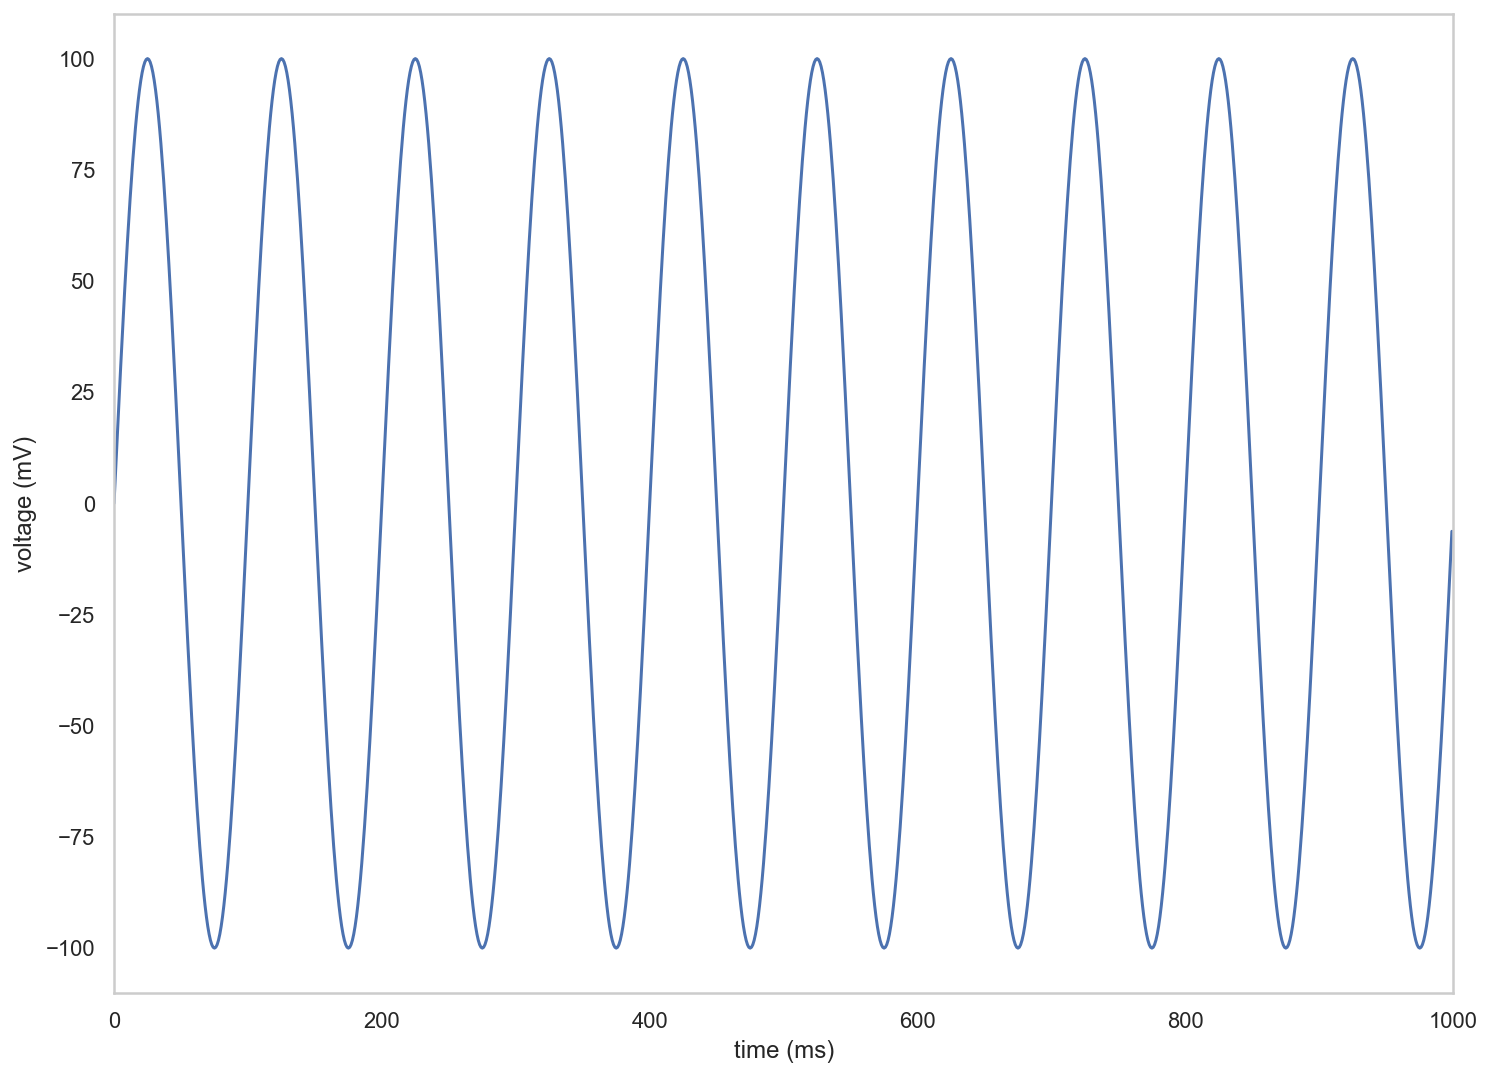

In [14]:
# define a function to create a sine wave
def sine_func(fs, freq, amp, time):
    samples = fs*time
    time = np.arange(samples)
    voltage = amp * np.sin(2 * np.pi * freq * time / fs)
    
    return time, voltage

fs = 1000 # sampling rate

freq = 10. # in Hz
amp = 100. # in arbitrary units (au)
duration = 1. # in seconds

time, sine = sine_func(fs, freq, amp, duration)

# plot some of the time series data
plt.plot(time, sine)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.xlim((0,1000)) # just plot the first second
plt.show()

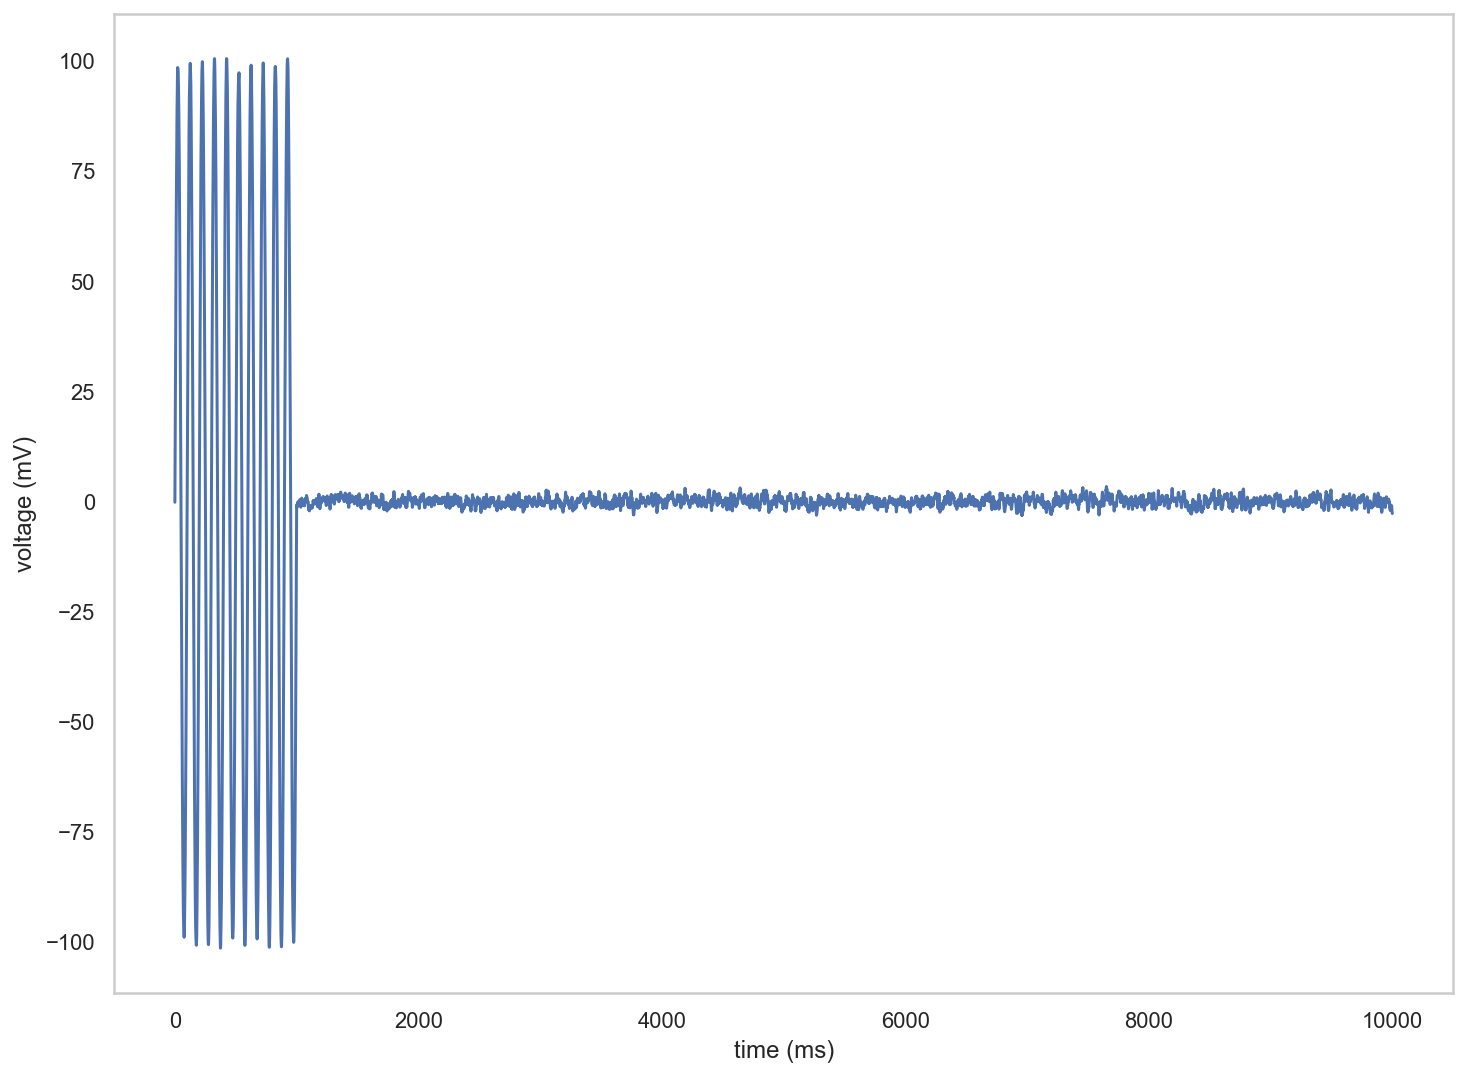

In [19]:
aperiodic1 = sim.sim_synaptic_current(duration, fs, 1000, 2., tau_r = 0.002, tau_d = 0.005)
aperiodic10 = sim.sim_synaptic_current(duration*10, fs, 1000, 2., tau_r = 0.002, tau_d = 0.005)
aperiodic100 = sim.sim_synaptic_current(duration*100, fs, 1000, 2., tau_r = 0.002, tau_d = 0.005)

sine1 = np.concatenate((sine, np.zeros((len(aperiodic1)-fs))), axis=0)
sine10 = np.concatenate((sine, np.zeros((len(aperiodic10)-fs))), axis=0)
sine100 = np.concatenate((sine, np.zeros((len(aperiodic100)-fs))), axis=0)

data1 = aperiodic1 + sine1
data10 = aperiodic10 + sine10
data100 = aperiodic100 + sine100

# plot some of the time series data
plt.plot(data10)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
# plt.xlim((0,1000)) # just plot the first second
plt.show()

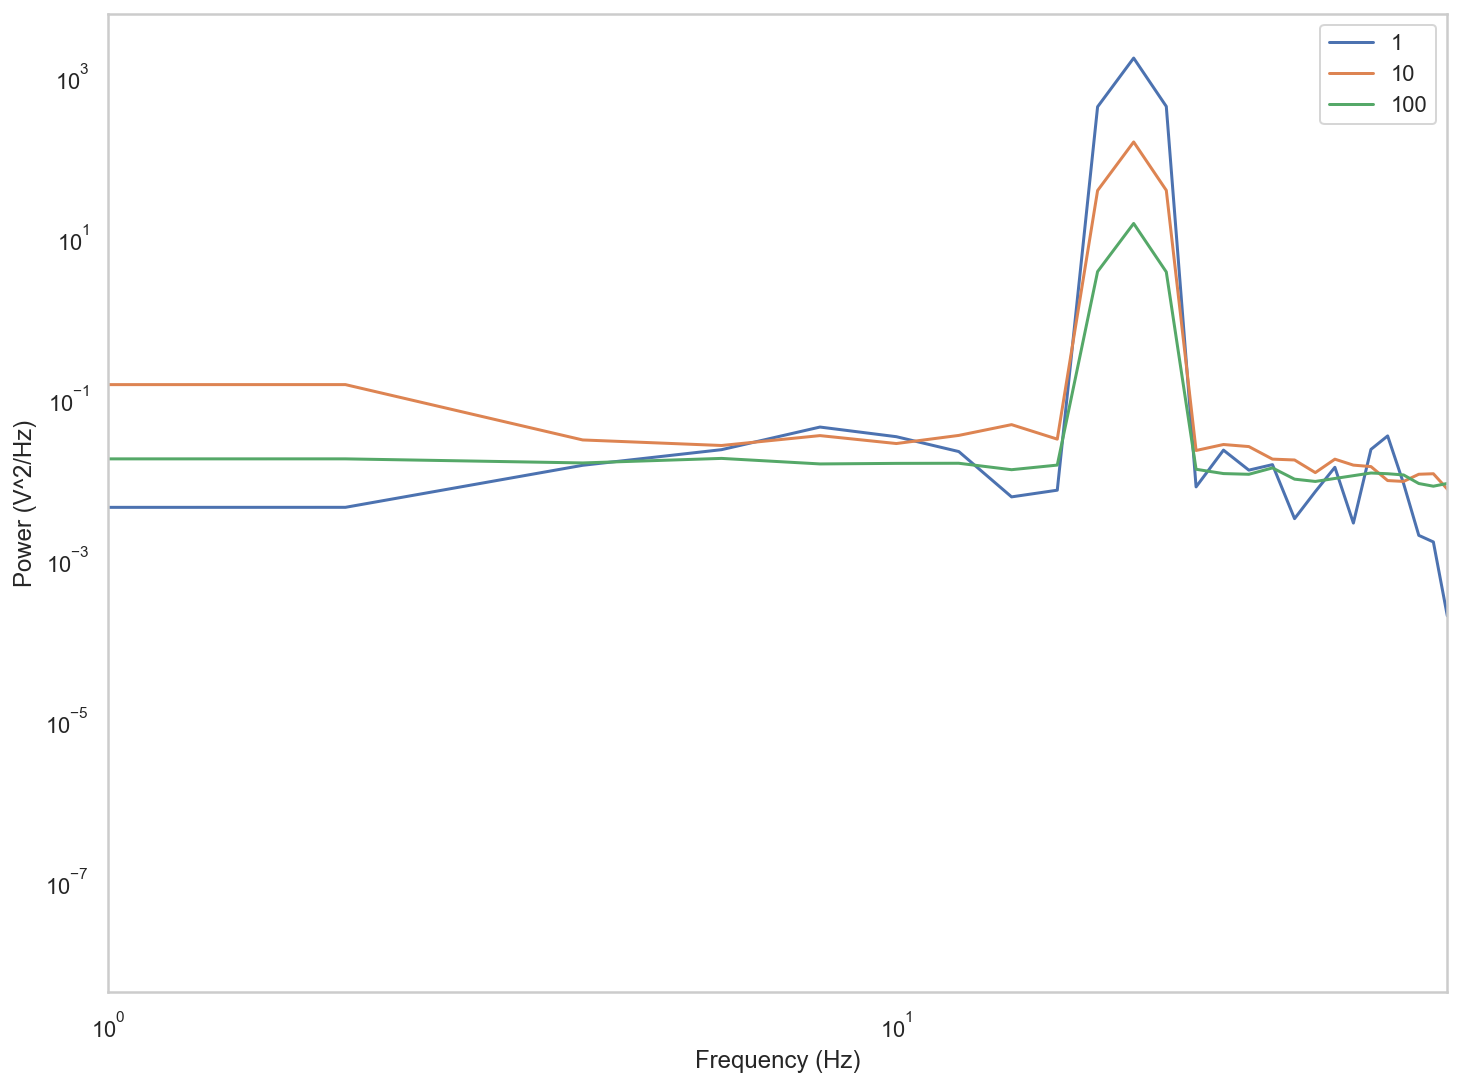

In [23]:
freq_mean, P_mean1 = spectral.compute_spectrum(data1, fs, method='welch',
                                              window='hann', nperseg=fs)
freq_mean, P_mean10 = spectral.compute_spectrum(data10, fs, method='welch',
                                              window='hann', nperseg=fs)
freq_mean, P_mean100 = spectral.compute_spectrum(data100, fs, method='welch',
                                              window='hann', nperseg=fs)

plt.loglog(freq_mean, P_mean1, label='1')
plt.loglog(freq_mean, P_mean10, label='10')
plt.loglog(freq_mean, P_mean100, label='100')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim((1, 50))
plt.legend()
plt.show()

In [ ]:
sim.periodic.sim_oscillation()